## Product Recommendation System

### Main Problem: Recommend products to customers based on their past purchases and product categories they tend to buy.

### Data Understanding
#### 1.0. What is the domain area of the dataset?
The Black Friday Sales dataset is a comprehensive collection of sales transaction data from a major retail store during a Black Friday event.

#### 1.1. Under which circumstances was it collected?
It is obtained from a major retail store during a Black Friday event.

#### 2.0. Which data format?
The format of the dataset is *.csv*

#### 2.1. Do the files have headers or another file describing the data?
The files does have headers that describes the data! Each column has a name that describes the data it contains!

#### 2.2. Are the data values separated by commas, semicolon, or tabs?
The data values are separated by commas!  
**Example:**   
User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase  
1000001,P00069042,F,0-17,10,A,2,0,3,,,8370  

#### 3.0 How many features and how many observations does the dataset have?
The dataset has:  
* over 550,000 observations or rows!  
* 12 features or columns!

#### 4.0 Does it contain numerical features? How many?
Yes it has 4 numerical features.

#### 5.0. Does it contain categorical features? How many?
Yes, it has 5 numerical features.

### Features

User ID: Unique ID for each customer.  
Product ID: Unique ID for each product.  
Gender: Gender of the customer, either male or female.  
Age: The age group of the customer, represented in categories (e.g., 18-25, 26-35, etc.).  
Occupation: Occupation category code of the customer.  
City_Category: The category of the city where the customer resides, classified as A, B, or C.  
Stay_In_Current_City_Years: Number of years the customer has lived in the current city.  
Marital_Status: Indicates whether the customer is married (1) or not (0).  
Product_Category 1, 2, 3: Product categories associated with the purchased item.  
Purchase: The amount spent by the customer on the product.  

##  Data Preprocessing

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv("datasets/BlackFriday.csv")

In [4]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
print(f"Number of features in the dataset is {dataset.shape[1]} and the number of observations/rows in the dataset is {dataset.shape[0]}")

Number of features in the dataset is 12 and the number of observations/rows in the dataset is 537577


### Checking Missing Values

In [8]:
dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [10]:
dataset['Product_Category_2'].fillna(0, inplace=True)
dataset['Product_Category_3'].fillna(0, inplace=True)

In [11]:
dataset.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### Encoding Categorical Variables

In [12]:
from sklearn.preprocessing import LabelEncoder

# 1. Label Encoding for Gender
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

In [14]:
# 2. Map Age to numerical values
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
dataset['Age'] = dataset['Age'].map(age_mapping)

In [15]:
# 3. One-Hot Encoding for Occupation and City_Category
dataset = pd.get_dummies(dataset, columns=['Occupation', 'City_Category'])

# 4. Convert Stay_In_Current_City_Years to numeric
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].replace({'4+': 4}).astype(int)

In [17]:
dataset.shape

(537577, 34)

## Exploratory Data Analysis

1. Analyze customer purchase patterns across Product_Category_1, 2, 3.

In [18]:
# Grouping by Product_Category_1 to analyze purchase patterns
category_1_group = dataset.groupby('Product_Category_1')['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

# Similarly for Product_Category_2 and Product_Category_3
category_2_group = dataset.groupby('Product_Category_2')['Purchase'].agg(['count', 'mean', 'sum']).reset_index()
category_3_group = dataset.groupby('Product_Category_3')['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

# View the results
# count: Total purchases in each category.
# mean: Average purchase amount per product category.
# sum: Total money spent in each category.

print(category_1_group.head())
print(category_2_group.head())
print(category_3_group.head())

   Product_Category_1   count          mean         sum
0                   1  138353  13607.701495  1882666325
1                   2   23499  11255.680752   264497242
2                   3   19849  10096.841705   200412211
3                   4   11567   2328.862886    26937957
4                   5  148592   6238.004045   926917497
  Product_Category_2  count          mean        sum
0                2.0  48481  13621.740682  660395610
1                3.0   2835  11229.532628   31835725
2                4.0  25225  10218.319009  257757097
3                5.0  25874   9034.054649  233747130
4                6.0  16251  11500.585872  186896021
  Product_Category_3  count          mean        sum
0                3.0    600  13957.166667    8374300
1                4.0   1840   9778.290761   17992055
2                5.0  16380  12128.351770  198662402
3                6.0   4818  13189.812785   63548518
4                8.0  12384  13029.554102  161357998


2. Segment customers based on purchase behavior

   Gender  Product_Category_1  count          mean        sum
0       0                   1  24401  13597.502561  331792660
1       0                   2   5573  11408.887314   63581729
2       0                   3   5874  10261.916071   60278495
3       0                   4   3572   2456.584267    8774919
4       0                   5  41199   6305.995607  259800713


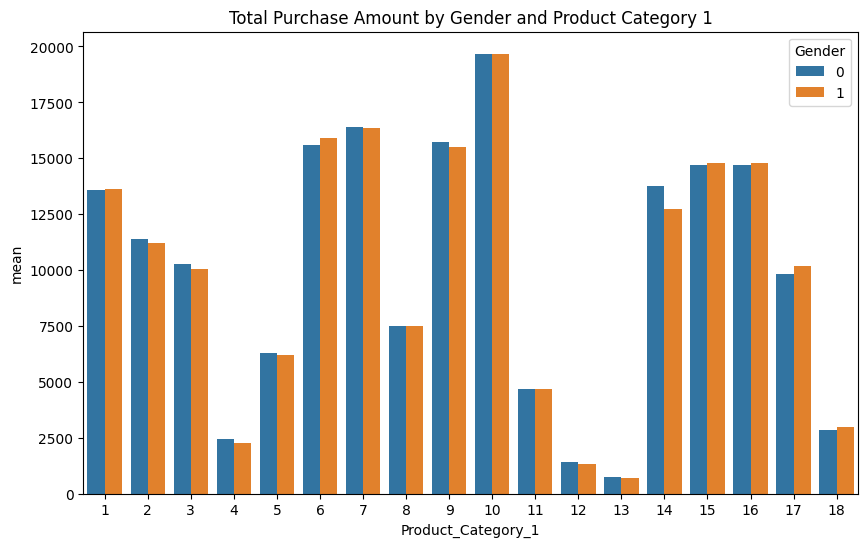

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Gender and Product_Category_1
gender_category_group = dataset.groupby(['Gender', 'Product_Category_1'])['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

# View results
print(gender_category_group.head())

# Visualize the patterns
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category_1', y='mean', hue='Gender', data=gender_category_group)
plt.title('Total Purchase Amount by Gender and Product Category 1')
plt.show()

   Gender Product_Category_2  count          mean        sum
0       0                2.0   9039  13747.387654  124262637
1       0                3.0    611  11088.430442    6775031
2       0                4.0   7451  10524.277144   78416389
3       0                5.0   6062   8061.557242   48869160
4       0                6.0   3242  10730.275139   34787552


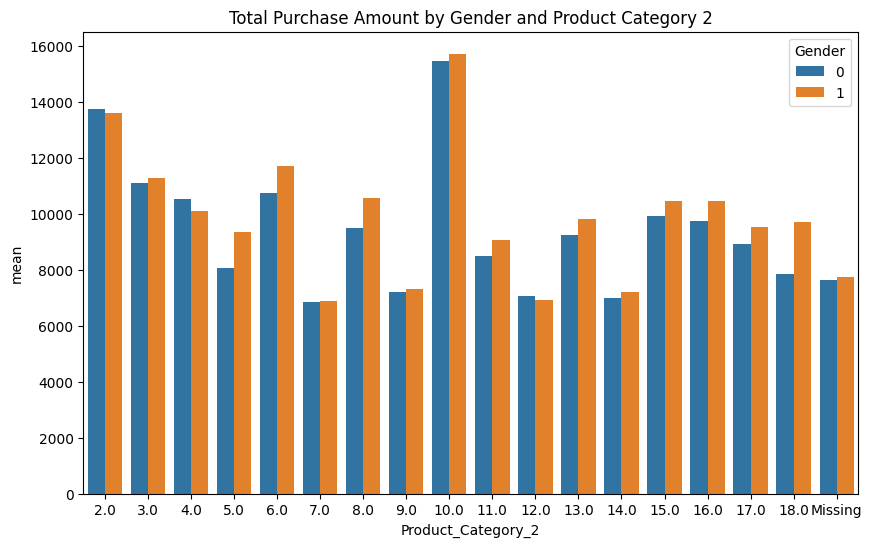

In [34]:
# Group by Gender and Product_Category_1
gender_category_group2 = dataset.groupby(['Gender', 'Product_Category_2'])['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

# View results
print(gender_category_group2.head())

# Visualize the patterns
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category_2', y='mean', hue='Gender', data=gender_category_group2)
plt.title('Total Purchase Amount by Gender and Product Category 2')
plt.show()

   Gender Product_Category_3  count          mean       sum
0       0                3.0     94  13067.755319   1228369
1       0                4.0    428  10381.656542   4443349
2       0                5.0   4215  12162.033689  51262972
3       0                6.0    816  13007.083333  10613780
4       0                8.0   2895  12180.471848  35262466


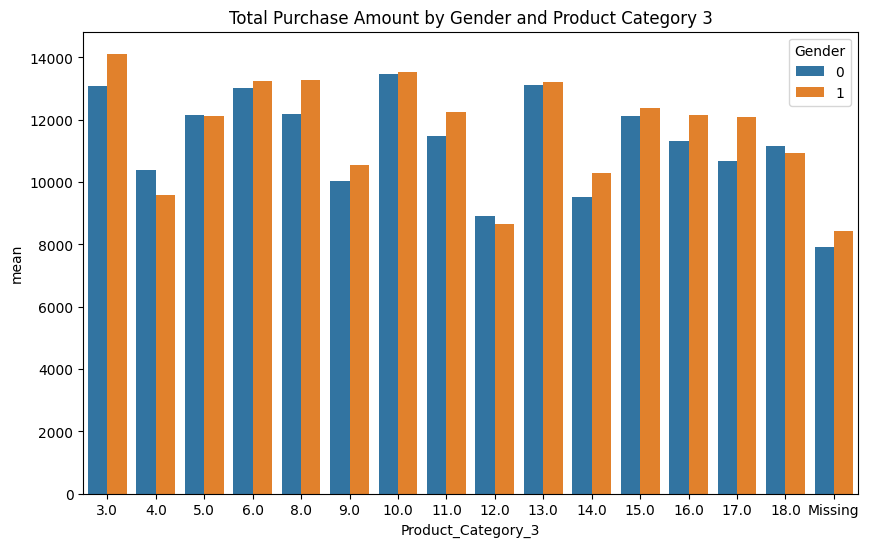

In [33]:
# Group by Gender and Product_Category_3
gender_category_group3 = dataset.groupby(['Gender', 'Product_Category_3'])['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

# View results
print(gender_category_group3.head())

# Visualize the patterns
plt.figure(figsize=(10,6))
sns.barplot(x='Product_Category_3', y='mean', hue='Gender', data=gender_category_group3)
plt.title('Total Purchase Amount by Gender and Product Category 3')
plt.show()

3. Segment customers based on features like Age, Gender, or City_Category, and analyze how these groups tend to spend.

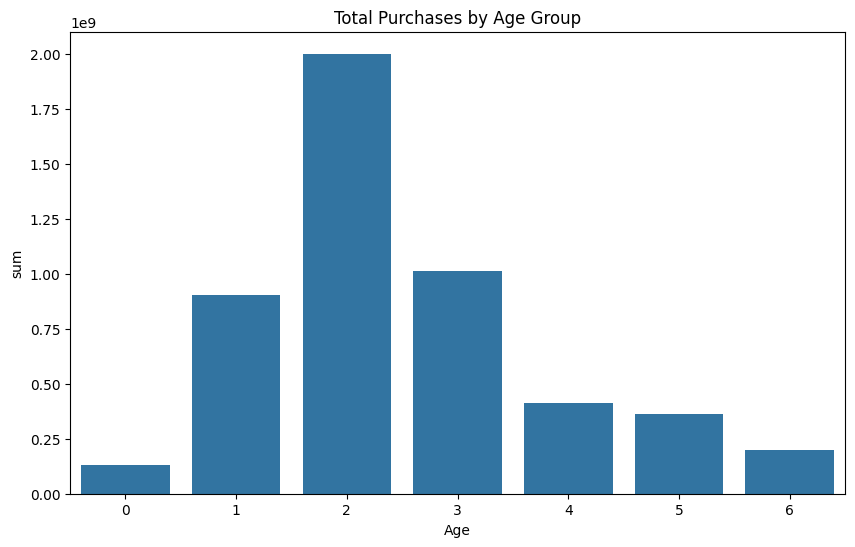

In [25]:
# Group by Age and analyze product purchases
age_purchase_group = dataset.groupby('Age')['Purchase'].agg(['count', 'mean', 'sum']).reset_index()
# '0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x='Age', y='sum', data=age_purchase_group)
plt.title('Total Purchases by Age Group')
plt.show()

   Gender   count         mean         sum
0       0  132197  8809.761349  1164624021
1       1  405380  9504.771713  3853044357


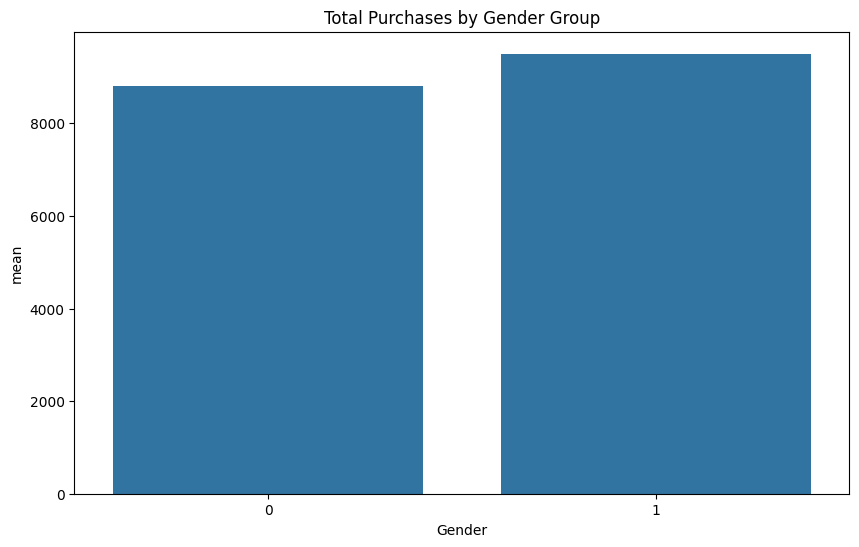

In [32]:
# Group by Age and analyze product purchases
gender_purchase_group = dataset.groupby('Gender')['Purchase'].agg(['count', 'mean', 'sum']).reset_index()

print(gender_purchase_group)

# F = 0
# M = 1

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x='Gender', y='mean', data=gender_purchase_group)
plt.title('Total Purchases by Gender Group')
plt.show()